In [3]:
# -*- coding: utf-8 -*-
"""
gridworld
https://github.com/awjuliani/DeepRL-Agents/blob/master/gridworld.py
@author: Administrator
"""

import numpy as np
import random
import itertools
import scipy.misc
import matplotlib.pyplot as plt


class gameOb():
    def __init__(self,coordinates,size,intensity,channel,reward,name):
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.size = size
        self.intensity = intensity
        self.channel = channel
        self.reward = reward
        self.name = name
        
class gameEnv():
    def __init__(self,partial,size):
        self.sizeX = size
        self.sizeY = size
        self.actions = 4
        self.objects = []
        self.partial = partial
        a = self.reset()
        plt.imshow(a,interpolation="nearest")
        
        
    def reset(self):
        self.objects = []
        hero = gameOb(self.newPosition(),1,1,2,None,'hero')
        self.objects.append(hero)
        bug = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug)
        hole = gameOb(self.newPosition(),1,1,0,-1,'fire')
        self.objects.append(hole)
        bug2 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug2)
        hole2 = gameOb(self.newPosition(),1,1,0,-1,'fire')
        self.objects.append(hole2)
        bug3 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug3)
        bug4 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(bug4)
        state = self.renderEnv()
        self.state = state
        return state

    def moveChar(self,direction):
        # 0 - up, 1 - down, 2 - left, 3 - right
        hero = self.objects[0]
        heroX = hero.x
        heroY = hero.y
        penalize = 0.
        if direction == 0 and hero.y >= 1:
            hero.y -= 1
        if direction == 1 and hero.y <= self.sizeY-2:
            hero.y += 1
        if direction == 2 and hero.x >= 1:
            hero.x -= 1
        if direction == 3 and hero.x <= self.sizeX-2:
            hero.x += 1     
        if hero.x == heroX and hero.y == heroY:
            penalize = 0.0
        self.objects[0] = hero
        return penalize
    
    def newPosition(self):
        iterables = [ range(self.sizeX), range(self.sizeY)]
        points = []
        for t in itertools.product(*iterables):
            points.append(t)
        currentPositions = []
        for objectA in self.objects:
            if (objectA.x,objectA.y) not in currentPositions:
                currentPositions.append((objectA.x,objectA.y))
        for pos in currentPositions:
            points.remove(pos)
        location = np.random.choice(range(len(points)),replace=False)
        return points[location]

    def checkGoal(self):
        others = []
        for obj in self.objects:
            if obj.name == 'hero':
                hero = obj
            else:
                others.append(obj)
        ended = False
        for other in others:
            if hero.x == other.x and hero.y == other.y:
                self.objects.remove(other)
                if other.reward == 1:
                    self.objects.append(gameOb(self.newPosition(),1,1,1,1,'goal'))
                else: 
                    self.objects.append(gameOb(self.newPosition(),1,1,0,-1,'fire'))
                return other.reward,False
        if ended == False:
            return 0.0,False

    def renderEnv(self):
        #a = np.zeros([self.sizeY,self.sizeX,3])
        a = np.ones([self.sizeY+2,self.sizeX+2,3])
        a[1:-1,1:-1,:] = 0
        hero = None
        for item in self.objects:
            a[item.y+1:item.y+item.size+1,item.x+1:item.x+item.size+1,item.channel] = item.intensity
            if item.name == 'hero':
                hero = item
        if self.partial == True:
            a = a[hero.y:hero.y+3,hero.x:hero.x+3,:]
        b = scipy.misc.imresize(a[:,:,0],[84,84,1],interp='nearest')
        c = scipy.misc.imresize(a[:,:,1],[84,84,1],interp='nearest')
        d = scipy.misc.imresize(a[:,:,2],[84,84,1],interp='nearest')
        a = np.stack([b,c,d],axis=2)
        return a

    def step(self,action):
        penalty = self.moveChar(action)
        reward,done = self.checkGoal()
        state = self.renderEnv()
        if reward == None:
            print(done)
            print(reward)
            print(penalty)
            return state,(reward+penalty),done
        else:
            return state,(reward+penalty),done


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:121: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


Instructions for updating:
Use tf.cast instead.
Saved Model
500 1.3 1
1000 2.5 1
1500 2.1 1
2000 3.4 1
2500 1.8 1
3000 1.7 1
3500 1.7 1
4000 1.6 1
4500 1.6 1
5000 2.1 1
5500 2.5 1
6000 1.8 1
6500 1.4 1
7000 3.8 1
7500 2.5 1
8000 2.5 1
8500 1.8 1
9000 1.2 1
9500 1.9 1
10000 2.5 1
10500 1.7 0.9549999999999828
11000 2.7 0.9099999999999655
11500 3.5 0.8649999999999483
12000 1.4 0.819999999999931
12500 2.5 0.7749999999999138
13000 2.2 0.7299999999998965
13500 1.5 0.6849999999998793
14000 1.0 0.639999999999862
14500 2.7 0.5949999999998448
15000 0.8 0.5499999999998275
15500 1.0 0.5049999999998103
16000 0.6 0.4599999999998177
16500 2.0 0.41499999999982823
17000 1.5 0.36999999999983874
17500 2.1 0.32499999999984924
18000 0.7 0.27999999999985975
18500 1.5 0.23499999999986562
19000 1.8 0.18999999999986225
19500 0.6 0.14499999999985888
20000 1.3 0.09999999999985551
20500 0.5 0.09999999999985551
21000 1.0 0.09999999999985551
21500 1.0 0.09999999999985551
22000 0.7 0.09999999999985551
22500 -0.2 0.0

136000 18.4 0.09999999999985551
136500 21.9 0.09999999999985551
137000 17.3 0.09999999999985551
137500 20.9 0.09999999999985551
138000 19.4 0.09999999999985551
138500 20.8 0.09999999999985551
139000 19.8 0.09999999999985551
139500 17.6 0.09999999999985551
140000 19.1 0.09999999999985551
140500 20.0 0.09999999999985551
141000 18.9 0.09999999999985551
141500 18.6 0.09999999999985551
142000 22.6 0.09999999999985551
142500 19.3 0.09999999999985551
143000 19.6 0.09999999999985551
143500 20.2 0.09999999999985551
144000 19.4 0.09999999999985551
144500 20.5 0.09999999999985551
145000 21.4 0.09999999999985551
145500 21.7 0.09999999999985551
146000 18.2 0.09999999999985551
146500 21.3 0.09999999999985551
147000 22.3 0.09999999999985551
147500 19.5 0.09999999999985551
148000 20.5 0.09999999999985551
148500 20.5 0.09999999999985551
149000 22.9 0.09999999999985551
149500 19.2 0.09999999999985551
150000 17.1 0.09999999999985551
Saved Model
150500 20.3 0.09999999999985551
151000 18.6 0.09999999999985

258500 22.6 0.09999999999985551
259000 21.8 0.09999999999985551
259500 22.8 0.09999999999985551
260000 23.0 0.09999999999985551
260500 23.6 0.09999999999985551
261000 21.5 0.09999999999985551
261500 24.2 0.09999999999985551
262000 22.9 0.09999999999985551
262500 23.4 0.09999999999985551
263000 23.2 0.09999999999985551
263500 21.5 0.09999999999985551
264000 24.7 0.09999999999985551
264500 21.9 0.09999999999985551
265000 19.7 0.09999999999985551
265500 22.0 0.09999999999985551
266000 21.5 0.09999999999985551
266500 22.9 0.09999999999985551
267000 23.3 0.09999999999985551
267500 24.7 0.09999999999985551
268000 23.5 0.09999999999985551
268500 22.7 0.09999999999985551
269000 22.0 0.09999999999985551
269500 20.6 0.09999999999985551
270000 22.5 0.09999999999985551
270500 21.7 0.09999999999985551
271000 21.5 0.09999999999985551
271500 23.1 0.09999999999985551
272000 23.9 0.09999999999985551
272500 23.7 0.09999999999985551
273000 23.4 0.09999999999985551
273500 24.5 0.09999999999985551
274000 2

KeyboardInterrupt: 

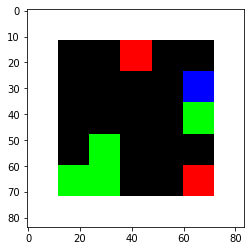

In [4]:
from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
import scipy.misc
import os
%matplotlib inline

#from gridworld import gameEnv

#========= 게임 환경 로딩 =========#
env = gameEnv(partial=False,size=5)

#========= 네트워크 구현 =========#
class Qnetwork():
    def __init__(self,h_size):
        #네트워크는 게임으로부터 하나의 프레임을 받아 이를 배열로 만든다 (flattening).
        #배열의 크기를 재조절해주고 4개의 컨벌루션 레이어를 거치면서 처리해 준다.
        self.scalarInput =  tf.placeholder(shape=[None,21168],dtype=tf.float32)
        self.imageIn = tf.reshape(self.scalarInput,shape=[-1,84,84,3])
        self.conv1 = slim.conv2d( \
            inputs=self.imageIn,num_outputs=32,kernel_size=[8,8],stride=[4,4],padding='VALID', biases_initializer=None)
        self.conv2 = slim.conv2d( \
            inputs=self.conv1,num_outputs=64,kernel_size=[4,4],stride=[2,2],padding='VALID', biases_initializer=None)
        self.conv3 = slim.conv2d( \
            inputs=self.conv2,num_outputs=64,kernel_size=[3,3],stride=[1,1],padding='VALID', biases_initializer=None)
        self.conv4 = slim.conv2d( \
            inputs=self.conv3,num_outputs=h_size,kernel_size=[7,7],stride=[1,1],padding='VALID', biases_initializer=None)
        
        #마지막 컨벌루션 레이어로부터의 출력값을 취한 후, 이를 어드밴티지 스트림과 값 스트림으로 분리한다. 
        self.streamAC,self.streamVC = tf.split(self.conv4,2,3)
        self.streamA = slim.flatten(self.streamAC)
        self.streamV = slim.flatten(self.streamVC)
        self.AW = tf.Variable(tf.random_normal([h_size//2,env.actions]))
        self.VW = tf.Variable(tf.random_normal([h_size//2,1]))
        self.Advantage = tf.matmul(self.streamA,self.AW)
        self.Value = tf.matmul(self.streamV,self.VW)
        
        #최종 Q-값을 얻기 위해 어드밴티지 스트림과 값 스트림을 조합해 준다. 
        self.Qout = self.Value + tf.subtract(self.Advantage,tf.reduce_mean(self.Advantage,axis=1,keep_dims=True))
        self.predict = tf.argmax(self.Qout,1)
        
        #타겟 Q 값과 예측 Q 값 간의 제곱합 차를 취함으로써 비용을 구한다.
        self.targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
        self.actions = tf.placeholder(shape=[None],dtype=tf.int32)
        self.actions_onehot = tf.one_hot(self.actions,env.actions,dtype=tf.float32)
        
        self.Q = tf.reduce_sum(tf.multiply(self.Qout, self.actions_onehot), axis=1)
        
        self.td_error = tf.square(self.targetQ - self.Q)
        self.loss = tf.reduce_mean(self.td_error)
        self.trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
        self.updateModel = self.trainer.minimize(self.loss)
        
#========= 경험 재생 =========#
#다음 클래스는 경험과 샘플을 저장하고 랜덤하게 신경망을 학습시킨다 
        
class experience_buffer():
    def __init__(self, buffer_size = 50000):
        self.buffer = []
        self.buffer_size = buffer_size
    
    def add(self,experience):
        if len(self.buffer) + len(experience) >= self.buffer_size:
            self.buffer[0:(len(experience)+len(self.buffer))-self.buffer_size] = []
        self.buffer.extend(experience)
            
    def sample(self,size):
        return np.reshape(np.array(random.sample(self.buffer,size)),[size,5])        

#다음은 게임의 프레임의 사이즈를 조절해 주는 간단한 함수이다.
def processState(states):
    return np.reshape(states,[21168])

#아래 함수들은 1차 신경망의 파라미터와 함께 목표 신경망의 파라미터를 업데이트하게 해준다
def updateTargetGraph(tfVars,tau):
    total_vars = len(tfVars)
    op_holder = []
    for idx,var in enumerate(tfVars[0:total_vars//2]):
        op_holder.append(tfVars[idx+total_vars//2].assign((var.value()*tau) + ((1-tau)*tfVars[idx+total_vars//2].value())))
    return op_holder

def updateTarget(op_holder,sess):
    for op in op_holder:
        sess.run(op)

#========= 신경망 학습 =========#

#모든 학습 파라미터를 설정한다            
batch_size = 32 #각 학습 단계에서 사용할 경험의 수
update_freq = 4 #학습 단계 기준의 업데이트 주기 
y = .99 #타겟 Q-값에 대한 할인 계수
startE = 1 #시작 시 랜덤 액션의 가능성
endE = 0.1 #종료 시 랜덤 액션의 가능성
anneling_steps = 10000. #startE에서 endE로 줄어드는데 필요한 학습 단계 수
num_episodes = 10000 #네트워크를 학습시키기 위한 게임 환경 에피소드의 수
pre_train_steps = 10000 #학습 시작 전 랜덤 액션의 단계 수
max_epLength = 50 #허용되는 최대 에피소드 길이
load_model = False #저장된 모델을 로딩할 지 여부
path = "./dqn" #모델을 저장할 경로
h_size = 512 #어드밴티지 스트림과 값 스트림으로 분리되기 전의 마지막 컨벌루션 레이어의 크기
tau = 0.001 #타겟 네트워크를 제1네트워크로 업데이트시켜 가는 비율

tf.reset_default_graph()
mainQN = Qnetwork(h_size)
targetQN = Qnetwork(h_size)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

trainables = tf.trainable_variables()

targetOps = updateTargetGraph(trainables,tau)

myBuffer = experience_buffer()

#랜덤 액션이 감소하는 비율을 설정 
e = startE
stepDrop = (startE - endE)/anneling_steps

#전체 보상과 에피소드 별 단계 수를 저장할 리스트를 생성
jList = []
rList = []
total_steps = 0

#모델이 저장될 경로 생성
if not os.path.exists(path):
    os.makedirs(path)

with tf.Session() as sess:
    sess.run(init)
    if load_model == True:
        print('Loading Model...')
        ckpt = tf.train.get_checkpoint_state(path)
        saver.restore(sess,ckpt.model_checkpoint_path)
    updateTarget(targetOps,sess) #타겟 네트워크가 제1네트워크와 동일하도록 설정
    for i in range(num_episodes):
        episodeBuffer = experience_buffer()
        #환경을 리셋하고 첫번째 관찰 얻기
        s = env.reset()
        s = processState(s)
        d = False
        rAll = 0
        j = 0
        #Q-네트워크
        while j < max_epLength: #만약 에이전트가 블록에 도달하기 위해 200회 이상 시도하면 종료
            j+=1
            # Q-네트워크로부터 (e의 확률로 랜덤한 액션과 함께) 그리디하게 액션을 선택한다.
            if np.random.rand(1) < e or total_steps < pre_train_steps:
                a = np.random.randint(0,4)
            else:
                a = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:[s]})[0]
            s1,r,d = env.step(a)
            s1 = processState(s1)
            total_steps += 1
            episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5])) #에피소드 버퍼에 경험을 저장
            
            if total_steps > pre_train_steps:
                if e > endE:
                    e -= stepDrop
                
                if total_steps % (update_freq) == 0:
                    trainBatch = myBuffer.sample(batch_size) #경험에서 특정 부분을 랜덤하게 획득
                    #타겟 Q-값에 대해 double DQN 업데이트를 수행
                    Q1 = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,3])})
                    Q2 = sess.run(targetQN.Qout,feed_dict={targetQN.scalarInput:np.vstack(trainBatch[:,3])})
                    end_multiplier = -(trainBatch[:,4] - 1)
                    doubleQ = Q2[range(batch_size),Q1]
                    targetQ = trainBatch[:,2] + (y*doubleQ * end_multiplier)
                    #타겟 값을 이용해 네트워크를 업데이트
                    _ = sess.run(mainQN.updateModel, \
                        feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]),mainQN.targetQ:targetQ, mainQN.actions:trainBatch[:,1]})
                    
                    updateTarget(targetOps,sess) #타겟 네트워크가 제1네트워크와 동일하도록 설정
            rAll += r
            s = s1
            
            if d == True:

                break
        
        myBuffer.add(episodeBuffer.buffer)
        jList.append(j)
        rList.append(rAll)
        #정기적으로 모델 저장
        if i % 1000 == 0:
            saver.save(sess,path+'/model-'+str(i)+'.cptk')
            print("Saved Model")
        if len(rList) % 10 == 0:
            print(total_steps,np.mean(rList[-10:]), e)
    saver.save(sess,path+'/model-'+str(i)+'.cptk')
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

#========= 신경망 학습 확인하기 =========#
#시간의 흐름에 따른 평균 보상

rMat = np.resize(np.array(rList),[len(rList)//100,100])
rMean = np.average(rMat,1)
plt.plot(rMean)